In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# reading dataset
ds = pd.read_csv('culturefood.csv')

CityWise Analysis: 

In [3]:
ds['City'] = ds['City'].str.strip() #removing unwanted character from data

In [4]:
#Making labels consistent throughout
ds.loc[ds['City'] == 'Kharghar, Navi Mumbai' , 'City'] = 'Navi Mumbai'
ds.loc[ds['City'] == 'Mumbai, MH' , 'City'] = 'Mumbai'
ds.loc[ds['City'].str.lower() == 'pune' , 'City'] = 'Pune'
ds.loc[ds['City'].str.lower() == 'new delhi', 'City'] = 'New Delhi'
ds.loc[ds['City'].str.lower() == 'navi mumbai', 'City'] = 'Navi Mumbai'
ds.loc[ds['City'].str.lower() == 'bengaluru', 'City'] = 'Bengaluru'
ds.loc[ds['City'].str.contains('Kalyan'), 'City'] = 'Thane'
ds.loc[ds['City'].str.contains('Ahmedabad'), 'City'] = 'Ahmedabad'

Number of Entries from each cities:

In [5]:
print("City names and Number of entries from each: ")
city_frame = pd.DataFrame(data = {'Names': ds.City.unique() ,
                                  'NumEntries': [ds.City.value_counts()[str(data)] for data in ds.City.unique()] })
city_frame['Percentage:'] = [data/city_frame['NumEntries'].sum()*100 for data in city_frame['NumEntries']]
print(city_frame.sort_values('NumEntries', ascending=False).to_string(index=False))

City names and Number of entries from each: 
         Names  NumEntries  Percentage:
          Pune          44    16.000000
        Mumbai          30    10.909091
       Jodhpur          21     7.636364
     Ahmedabad          19     6.909091
     Bangalore          14     5.090909
     Hyderabad          13     4.727273
         Delhi          12     4.363636
       Chennai           8     2.909091
         Thane           8     2.909091
     New Delhi           8     2.909091
     Bengaluru           7     2.545455
        Nagpur           6     2.181818
   Navi Mumbai           6     2.181818
       Gurgaon           6     2.181818
         Surat           5     1.818182
        Jaipur           4     1.454545
      Vadodara           4     1.454545
    Chandigarh           4     1.454545
        Indore           4     1.454545
       Kolkata           4     1.454545
      Ludhiana           3     1.090909
        Nashik           2     0.727273
      New York           2     0.72

How do People Manage thier meals:

In [6]:
meals = pd.DataFrame(data = {'Cook' : [ ds['managingmeals'].str.contains('A cook who prepares them for me').value_counts()[1] ], 
                             'Outside': [ ds['managingmeals'].str.contains('Eat Outside \(order online or go out to dine\)').value_counts()[1] ],
                            'Ownmeals' : [ ds['managingmeals'].str.contains('Cook my own meals').value_counts()[1] ] } )
print("Number of Entries:")
print(meals)

Number of Entries:
   Cook  Outside  Ownmeals
0   148       79       112


In [7]:
mealpercentage = pd.DataFrame(data = {'Preference': ['Cook' , 'Outside' , 'Ownmeals'] ,'percentage': [  meals['Cook']/(meals['Cook'] + meals['Outside'] + meals['Ownmeals'] ) * 100 ,
                                     meals['Outside']/(meals['Cook'] + meals['Outside'] + meals['Ownmeals'] ) * 100 ,
                                     meals['Ownmeals']/(meals['Cook'] + meals['Outside'] + meals['Ownmeals'] ) * 100 ]})

In [8]:
mealpercentage

,Preference,percentage
0,Cook,0 43.657817 dtype: float64
1,Outside,0 23.303835 dtype: float64
2,Ownmeals,0 33.038348 dtype: float64


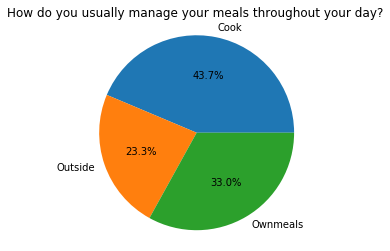

In [9]:
plt.pie(mealpercentage['percentage'],labels=mealpercentage['Preference'],autopct='%1.1f%%',radius = 0.1)
plt.title('How do you usually manage your meals throughout your day?')
plt.axis('equal')
#plt.tight_layout()
plt.show()

City Wise meals management:

In [10]:
listcities = ['Pune', 'Mumbai', 'Delhi']

In [11]:
def labelwisepie(labelname , column):
    print("For ", labelname , ": ")
    mealscity = ds.loc[ds[column] == labelname, 'managingmeals']
    meals = pd.DataFrame(data = {'Cook' : [ mealscity.str.contains('A cook who prepares them for me').value_counts()[1] ], 
                                 'Outside': [ mealscity.str.contains('Eat Outside \(order online or go out to dine\)').value_counts()[1] ],
                                'Ownmeals' : [ mealscity.str.contains('Cook my own meals').value_counts()[1] ] } )
    print("Number of Entries:")
    print(meals)
    mealpercentage = pd.DataFrame(data = {'Preference': ['Cook' , 'Outside' , 'Ownmeals'] ,'percentage': [  meals['Cook']/(meals['Cook'] + meals['Outside'] + meals['Ownmeals'] ) * 100 ,
                                         meals['Outside']/(meals['Cook'] + meals['Outside'] + meals['Ownmeals'] ) * 100 ,
                                         meals['Ownmeals']/(meals['Cook'] + meals['Outside'] + meals['Ownmeals'] ) * 100 ]})
    plt.pie(mealpercentage['percentage'],labels=mealpercentage['Preference'],autopct='%1.1f%%',radius = 0.1)
    plt.title('How do you usually manage your meals throughout your day?')
    plt.axis('equal')
    #plt.tight_layout()
    plt.show()

For  Pune : 
Number of Entries:
   Cook  Outside  Ownmeals
0    26        7        18


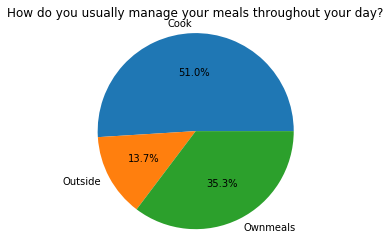

For  Mumbai : 
Number of Entries:
   Cook  Outside  Ownmeals
0    13       11        11


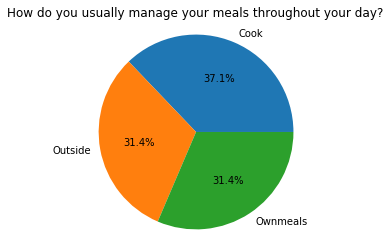

For  Delhi : 
Number of Entries:
   Cook  Outside  Ownmeals
0     7        5         4


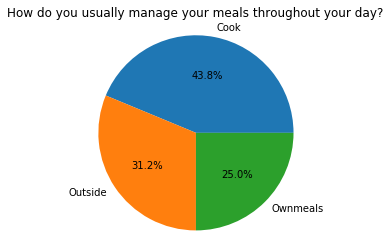

In [12]:
column = 'City'
for data in listcities:
    labelwisepie(data , column)

Meal Management according to relationship status:

In [13]:
liststatus = ['Single','Married','Prefer not to say'] #not using relationship since only one entry found

For  Single : 
Number of Entries:
   Cook  Outside  Ownmeals
0   128       73        90


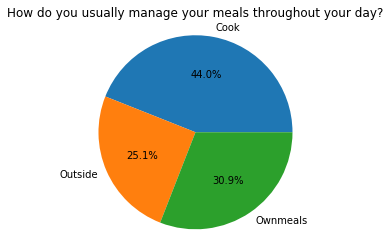

For  Married : 
Number of Entries:
   Cook  Outside  Ownmeals
0    15        2        20


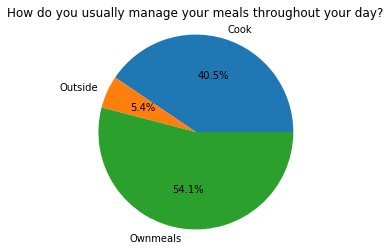

For  Prefer not to say : 
Number of Entries:
   Cook  Outside  Ownmeals
0     3        4         1


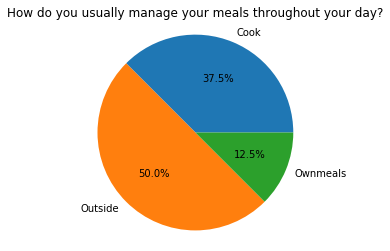

In [14]:
for data in liststatus:
    labelwisepie(data , 'MaritalStatus')

Meal Management with respect to age:

In [15]:
def labelwisepieage(labelname , column):
    print("For ", labelname , ": ")
    if labelname == '25to30':
        ages = ds.loc[ds['Age'] > 25 ,['Age', 'managingmeals'] ]
        mealscity = ages.loc[ages['Age'] < 30 , 'managingmeals' ]
    if labelname == 'lessthan25':
        mealscity = ds.loc[ds['Age'] < 25 ,'managingmeals' ]
    if labelname == 'morethan30':
        mealscity = ds.loc[ds['Age'] > 30 ,'managingmeals' ]
    meals = pd.DataFrame(data = {'Cook' : [ mealscity.str.contains('A cook who prepares them for me').value_counts()[1] ], 
                                 'Outside': [ mealscity.str.contains('Eat Outside \(order online or go out to dine\)').value_counts()[1] ],
                                'Ownmeals' : [ mealscity.str.contains('Cook my own meals').value_counts()[1] ] } )
    print("Number of Entries:")
    print(meals)
    mealpercentage = pd.DataFrame(data = {'Preference': ['Cook' , 'Outside' , 'Ownmeals'] ,'percentage': [  meals['Cook']/(meals['Cook'] + meals['Outside'] + meals['Ownmeals'] ) * 100 ,
                                         meals['Outside']/(meals['Cook'] + meals['Outside'] + meals['Ownmeals'] ) * 100 ,
                                         meals['Ownmeals']/(meals['Cook'] + meals['Outside'] + meals['Ownmeals'] ) * 100 ]})
    plt.pie(mealpercentage['percentage'],labels=mealpercentage['Preference'],autopct='%1.1f%%',radius = 0.1)
    plt.title('How do you usually manage your meals throughout your day?')
    plt.axis('equal')
    #plt.tight_layout()
    plt.show()

For  25to30 : 
Number of Entries:
   Cook  Outside  Ownmeals
0    25       19        19


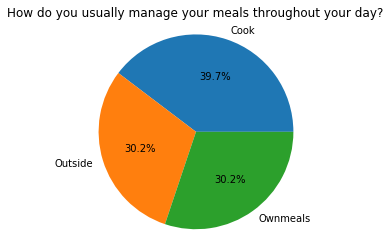

For  lessthan25 : 
Number of Entries:
   Cook  Outside  Ownmeals
0    98       48        59


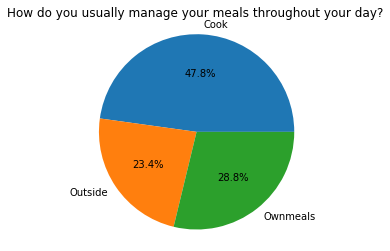

For  morethan30 : 
Number of Entries:
   Cook  Outside  Ownmeals
0    13        2        19


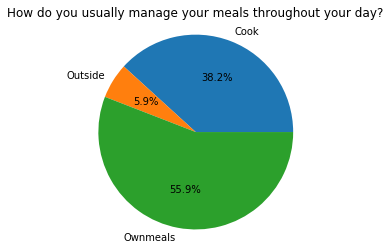

In [16]:
Agegroup = ['25to30', 'lessthan25', 'morethan30']
for data in Agegroup:
    labelwisepieage(data , 'Age')

Meal Management with respect to employment status:

In [17]:
ds.CurrentEmploymentStatus.unique()

array(['Self employed', 'Employed full time', 'Student', 'Freelancer',
       'Employed part time', 'Unemployed', 'MC :) ', 'Home maker',
       'Homemaker', 'Homemaker '], dtype=object)

In [18]:
employmentstatus = ['Self employed' ,'Employed full time', 'Student', 'Freelancer', 'Employed part time', 'Unemployed']

For  Self employed : 
Number of Entries:
   Cook  Outside  Ownmeals
0    18        6         7


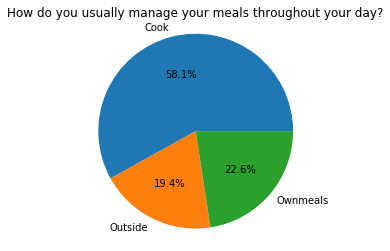

For  Employed full time : 
Number of Entries:
   Cook  Outside  Ownmeals
0    54       35        44


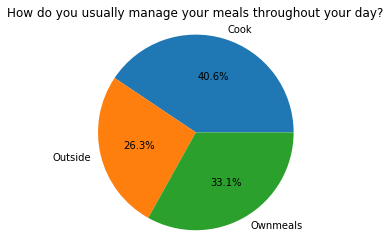

For  Student : 
Number of Entries:
   Cook  Outside  Ownmeals
0    67       27        42


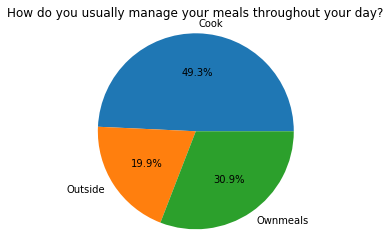

For  Freelancer : 
Number of Entries:
   Cook  Outside  Ownmeals
0     5        4         4


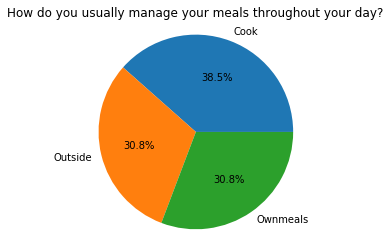

For  Employed part time : 
Number of Entries:
   Cook  Outside  Ownmeals
0     1        2         4


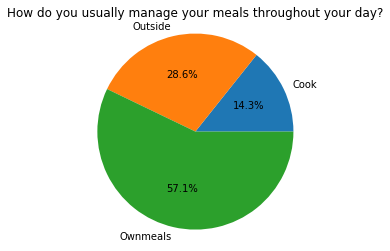

For  Unemployed : 
Number of Entries:
   Cook  Outside  Ownmeals
0     2        4         8


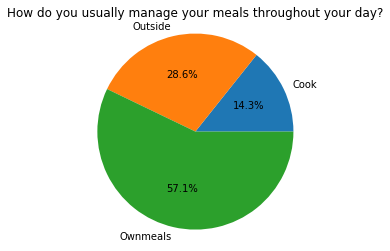

In [19]:
for data in employmentstatus:
    labelwisepie(data , 'CurrentEmploymentStatus')

What are the major age groups?
Which cities do they belong to?
What are thier current status?

For age group of 25 to 30:

Number of entries 19
City names and Number of entries for age group 25 to 30: 
      Names  NumEntries  Percentage:
  Bangalore           7    14.583333
       Pune           6    12.500000
     Mumbai           5    10.416667
  Bengaluru           4     8.333333
    Gurgaon           4     8.333333
  Hyderabad           3     6.250000
  New Delhi           2     4.166667
      Surat           2     4.166667
    Jodhpur           1     2.083333
     JAIPUR           1     2.083333
     Barmer           1     2.083333
 Chandigarh           1     2.083333
     Jaipur           1     2.083333
     jaipur           1     2.083333
     Nashik           1     2.083333
     Nagpur           1     2.083333
        Goa           1     2.083333
   Vadodara           1     2.083333
    Kolkata           1     2.083333
      Ajmer           1     2.083333
      Delhi           1     2.083333
   Ludhiana           1     2.083333
     Kuwait           1     2.083333

                Names  NumEntrie

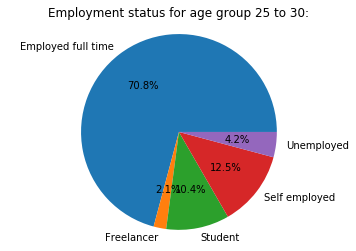

In [52]:
Age25to30 = ds.loc[ ( ds['Age'] > 25 ) & ( ds['Age'] < 30 ) ]
print('Number of entries',len(Age25to30.columns))
print("City names and Number of entries for age group 25 to 30: ")
city_frame = pd.DataFrame(data = {'Names': Age25to30.City.unique() ,
                                  'NumEntries': [Age25to30.City.value_counts()[str(data)] for data in Age25to30.City.unique()] })
city_frame['Percentage:'] = [data/city_frame['NumEntries'].sum()*100 for data in city_frame['NumEntries']]
print(city_frame.sort_values('NumEntries', ascending=False).to_string(index=False))

#Employment Status:
Employmentstatus = pd.DataFrame(data = {'Names': Age25to30.CurrentEmploymentStatus.unique() ,
                                  'NumEntries': [Age25to30.CurrentEmploymentStatus.value_counts()[str(data)] for data in Age25to30.CurrentEmploymentStatus.unique()] })
Employmentstatus['Percentage:'] = [data/Employmentstatus['NumEntries'].sum()*100 for data in Employmentstatus['NumEntries']]
print()
print(Employmentstatus)
print()
plt.pie(Employmentstatus['Percentage:'],labels=Employmentstatus['Names'],autopct='%1.1f%%',radius = 0.1)
plt.title('Employment status for age group 25 to 30:')
plt.axis('equal')
#plt.tight_layout()
plt.show()

#Maratial Status:
MaritalStatus = pd.DataFrame(data = {'Names': Age25to30.MaritalStatus.unique() ,
                                  'NumEntries': [Age25to30.MaritalStatus.value_counts()[str(data)] for data in Age25to30.MaritalStatus.unique()] })
MaritalStatus['Percentage:'] = [data/MaritalStatus['NumEntries'].sum()*100 for data in MaritalStatus['NumEntries']]
print()
print(MaritalStatus)
print()
plt.pie(MaritalStatus['Percentage:'],labels=MaritalStatus['Names'],autopct='%1.1f%%',radius = 0.1)
plt.title('Marital Status for age group 25 to 30:')
plt.axis('equal')
#plt.tight_layout()
plt.show()

For age group of 20 to 25:

In [80]:
import numpy
Age20to25 = ds.loc[ ( ds['Age'] > 20 ) & ( ds['Age'] < 25 ) ]
print('Number of entries',len(Age20to25.columns))
print("City names and Number of entries for age group 20 to 25: ")
city_frame = pd.DataFrame(data = {'Names': Age20to25.City.unique() ,
                                  'NumEntries': [Age20to25.City.value_counts()[str(data)] for data in Age20to25.City.unique()] })
city_frame['Percentage:'] = [data/city_frame['NumEntries'].sum()*100 for data in city_frame['NumEntries']]
print(city_frame.sort_values('NumEntries', ascending=False).to_string(index=False))


#First preference:
uniq = Age20to25.rank1
print(uniq)
'''
FirstPreference = pd.DataFrame(data = {'Names': uniq ,
                                  'NumEntries': [Age20to25.rank1.value_counts()[str(data)] for data in uniq] })
FirstPreference['Percentage:'] = [data/FirstPreference['NumEntries'].sum()*100 for data in FirstPreference['NumEntries']]
print()
print(FirstPreference)
print()
plt.pie(FirstPreference['Percentage:'],labels=FirstPreference['Names'],autopct='%1.1f%%',radius = 0.1)
plt.title('1st preference selected by users: ')
plt.axis('equal')
#plt.tight_layout()
plt.show()
'''

Number of entries 19
City names and Number of entries for age group 20 to 25: 
         Names  NumEntries  Percentage:
          Pune          17    13.821138
        Mumbai          15    12.195122
       Jodhpur          13    10.569106
     Hyderabad           8     6.504065
         Delhi           6     4.878049
        Nagpur           5     4.065041
     Bangalore           5     4.065041
         Thane           5     4.065041
     New Delhi           5     4.065041
     Ahmedabad           4     3.252033
   Navi Mumbai           3     2.439024
       Kolkata           3     2.439024
        Indore           3     2.439024
    Chandigarh           3     2.439024
       Chennai           2     1.626016
         Surat           2     1.626016
       Manipal           2     1.626016
     Kathmandu           2     1.626016
     Bengaluru           2     1.626016
         Latur           1     0.813008
      New York           1     0.813008
        Rajkot           1     0.813008
 

"\nFirstPreference = pd.DataFrame(data = {'Names': uniq ,\n                                  'NumEntries': [Age20to25.rank1.value_counts()[str(data)] for data in uniq] })\nFirstPreference['Percentage:'] = [data/FirstPreference['NumEntries'].sum()*100 for data in FirstPreference['NumEntries']]\nprint()\nprint(FirstPreference)\nprint()\nplt.pie(FirstPreference['Percentage:'],labels=FirstPreference['Names'],autopct='%1.1f%%',radius = 0.1)\nplt.title('1st preference selected by users: ')\nplt.axis('equal')\n#plt.tight_layout()\nplt.show()\n"

In [65]:
print(Age20to25.rank1.unique())
dat = [Age20to25.rank1.value_counts()[str(data)] for data in Age20to25.rank1.unique()]
dat

['Richness in taste' 'Freshness & quality of food'
 'Calories cont of the meal' 'Time to cook/get it delivered'
 'Value for money' 'Calorie count of the meal' nan]


KeyError: 'nan'

For age Group less than 20:

Number of entries 19
City names and Number of entries for age group less than 20: 
       Names  NumEntries  Percentage:
        Pune           5    33.333333
   Ahmedabad           3    20.000000
 Bhubaneswar           1     6.666667
   Hyderabad           1     6.666667
      Mumbai           1     6.666667
     Chennai           1     6.666667
     Gurgaon           1     6.666667
      Jaipur           1     6.666667
      Indore           1     6.666667

        Names  NumEntries  Percentage:
0  Freelancer           1     6.666667
1     Student          14    93.333333



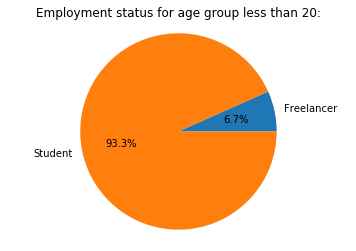


               Names  NumEntries  Percentage:
0             Single          14    93.333333
1  Prefer not to say           1     6.666667



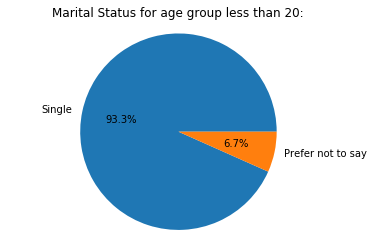

In [57]:
Age20 = ds.loc[ ( ds['Age'] < 20 ) ]
print('Number of entries',len(Age20.columns))
print("City names and Number of entries for age group less than 20: ")
city_frame = pd.DataFrame(data = {'Names': Age20.City.unique() ,
                                  'NumEntries': [Age20.City.value_counts()[str(data)] for data in Age20.City.unique()] })
city_frame['Percentage:'] = [data/city_frame['NumEntries'].sum()*100 for data in city_frame['NumEntries']]
print(city_frame.sort_values('NumEntries', ascending=False).to_string(index=False))
#Employment Status:
Employmentstatus = pd.DataFrame(data = {'Names': Age20.CurrentEmploymentStatus.unique() ,
                                  'NumEntries': [Age20.CurrentEmploymentStatus.value_counts()[str(data)] for data in Age20.CurrentEmploymentStatus.unique()] })
Employmentstatus['Percentage:'] = [data/Employmentstatus['NumEntries'].sum()*100 for data in Employmentstatus['NumEntries']]
print()
print(Employmentstatus)
print()
plt.pie(Employmentstatus['Percentage:'],labels=Employmentstatus['Names'],autopct='%1.1f%%',radius = 0.1)
plt.title('Employment status for age group less than 20:')
plt.axis('equal')
#plt.tight_layout()
plt.show()

#Maratial Status:
MaritalStatus = pd.DataFrame(data = {'Names': Age20.MaritalStatus.unique() ,
                                  'NumEntries': [Age20.MaritalStatus.value_counts()[str(data)] for data in Age20.MaritalStatus.unique()] })
MaritalStatus['Percentage:'] = [data/MaritalStatus['NumEntries'].sum()*100 for data in MaritalStatus['NumEntries']]
print()
print(MaritalStatus)
print()
plt.pie(MaritalStatus['Percentage:'],labels=MaritalStatus['Names'],autopct='%1.1f%%',radius = 0.1)
plt.title('Marital Status for age group less than 20:')
plt.axis('equal')
#plt.tight_layout()
plt.show()


For age Group Greater than 30:

Number of entries 19
City names and Number of entries for age group greater than 30: 
       Names  NumEntries  Percentage:
   Ahmedabad           9       28.125
        Pune           5       15.625
      Mumbai           4       12.500
       Thane           3        9.375
   Greenwich           1        3.125
   Bangalore           1        3.125
    Brampton           1        3.125
    Bhusawal           1        3.125
 Navi Mumbai           1        3.125
 Chicago Usa           1        3.125
     Chennai           1        3.125
    Bhusaval           1        3.125
        Vapi           1        3.125
   Bengaluru           1        3.125
    New York           1        3.125

                Names  NumEntries  Percentage:
0  Employed full time          21       65.625
1       Self employed           4       12.500
2          Freelancer           1        3.125
3  Employed part time           1        3.125
4          Home maker           2        6.250
5           Homemaker  

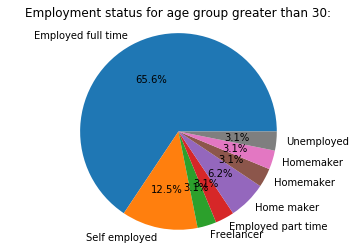


     Names  NumEntries  Percentage:
0  Married          30        93.75
1   Single           2         6.25



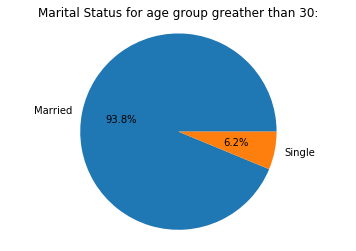


                           Names  NumEntries  Percentage:
0    Freshness & quality of food          28       87.500
1  Time to cook/get it delivered           1        3.125
2      Calorie count of the meal           1        3.125
3                Value for money           1        3.125
4              Richness in taste           1        3.125



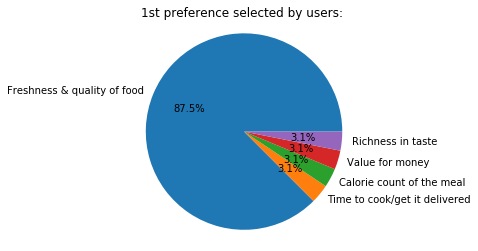


                           Names  NumEntries  Percentage:
0                Value for money           8       25.000
1    Freshness & quality of food           4       12.500
2      Calorie count of the meal           7       21.875
3  Time to cook/get it delivered           6       18.750
4              Richness in taste           7       21.875



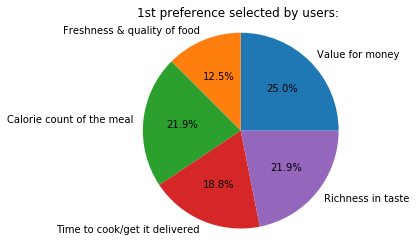

In [60]:
Age30 = ds.loc[ ( ds['Age'] > 30 ) ]
print('Number of entries',len(Age30.columns))
print("City names and Number of entries for age group greater than 30: ")
city_frame = pd.DataFrame(data = {'Names': Age30.City.unique() ,
                                  'NumEntries': [Age30.City.value_counts()[str(data)] for data in Age30.City.unique()] })
city_frame['Percentage:'] = [data/city_frame['NumEntries'].sum()*100 for data in city_frame['NumEntries']]
print(city_frame.sort_values('NumEntries', ascending=False).to_string(index=False))

#Employment Status:
Employmentstatus = pd.DataFrame(data = {'Names': Age30.CurrentEmploymentStatus.unique() ,
                                  'NumEntries': [Age30.CurrentEmploymentStatus.value_counts()[str(data)] for data in Age30.CurrentEmploymentStatus.unique()] })
Employmentstatus['Percentage:'] = [data/Employmentstatus['NumEntries'].sum()*100 for data in Employmentstatus['NumEntries']]
print()
print(Employmentstatus)
print()
plt.pie(Employmentstatus['Percentage:'],labels=Employmentstatus['Names'],autopct='%1.1f%%',radius = 0.1)
plt.title('Employment status for age group greater than 30:')
plt.axis('equal')
#plt.tight_layout()
plt.show()

#Maratial Status:
MaritalStatus = pd.DataFrame(data = {'Names': Age30.MaritalStatus.unique() ,
                                  'NumEntries': [Age30.MaritalStatus.value_counts()[str(data)] for data in Age30.MaritalStatus.unique()] })
MaritalStatus['Percentage:'] = [data/MaritalStatus['NumEntries'].sum()*100 for data in MaritalStatus['NumEntries']]
print()
print(MaritalStatus)
print()
plt.pie(MaritalStatus['Percentage:'],labels=MaritalStatus['Names'],autopct='%1.1f%%',radius = 0.1)
plt.title('Marital Status for age group greather than 30:')
plt.axis('equal')
#plt.tight_layout()
plt.show()

#First preference:
FirstPreference = pd.DataFrame(data = {'Names': Age30.rank1.unique() ,
                                  'NumEntries': [Age30.rank1.value_counts()[str(data)] for data in Age30.rank1.unique()] })
FirstPreference['Percentage:'] = [data/FirstPreference['NumEntries'].sum()*100 for data in FirstPreference['NumEntries']]
print()
print(FirstPreference)
print()
plt.pie(FirstPreference['Percentage:'],labels=FirstPreference['Names'],autopct='%1.1f%%',radius = 0.1)
plt.title('1st preference selected by users: ')
plt.axis('equal')
#plt.tight_layout()
plt.show()

#Second preference:
FirstPreference = pd.DataFrame(data = {'Names': Age30.rank2.unique() ,
                                  'NumEntries': [Age30.rank2.value_counts()[str(data)] for data in Age30.rank2.unique()] })
FirstPreference['Percentage:'] = [data/FirstPreference['NumEntries'].sum()*100 for data in FirstPreference['NumEntries']]
print()
print(FirstPreference)
print()
plt.pie(FirstPreference['Percentage:'],labels=FirstPreference['Names'],autopct='%1.1f%%',radius = 0.1)
plt.title('2st preference selected by users: ')
plt.axis('equal')
#plt.tight_layout()
plt.show()

Average Age:

In [36]:
print("Average Age: ", ds['Age'].mean())

Average Age:  25.62909090909091
